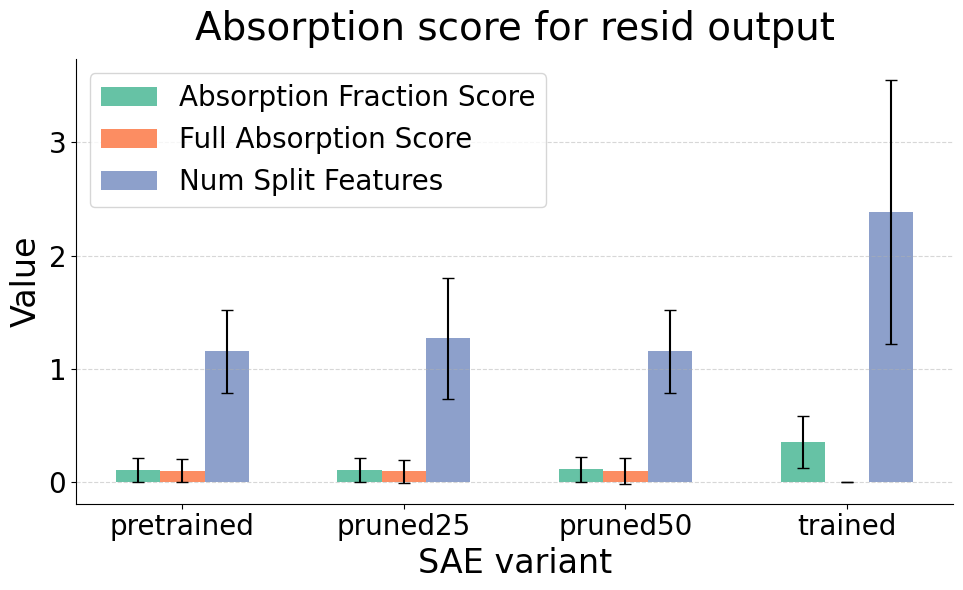

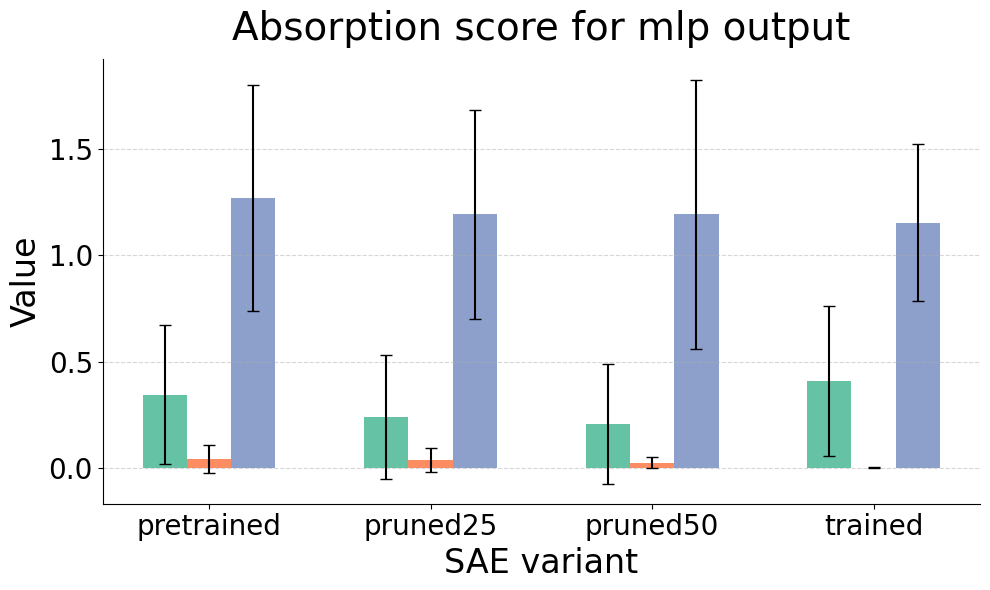

In [22]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

outputs = ['resid', 'mlp']
for out in outputs:

    df = pd.read_csv(f'/local/scratch/suchit/COLM/result_files/{out}/absorption.csv')
    # Extract metric base name and statistic (mean/std_dev)
    df["base_metric"] = df["metric"].str.extract(r'(absorption_fraction_score|full_absorption_score|num_split_features)')
    df["statistic"] = df["metric"].str.extract(r'^(mean|std_dev)')

    # Melt the DataFrame for seaborn plotting
    df_melted = df.melt(id_vars=["base_metric", "statistic"], 
                        value_vars=["pruned50", "pretrained", "pruned25", "trained"],
                        var_name="model", value_name="value")

    df_melted
    # Pivot the data for plotting
    mean_df = df_melted[df_melted['statistic'] == 'mean'].pivot(index='model', columns='base_metric', values='value')
    std_df = df_melted[df_melted['statistic'] == 'std_dev'].pivot(index='model', columns='base_metric', values='value')

    model_order = ['pretrained', 'trained', 'pruned25', 'pruned50']
    mean_df = mean_df.loc[model_order]
    std_df = std_df.loc[model_order]

    # Set seaborn color palette
    colors = sns.color_palette("Set2", n_colors=3)

    # Prepare mean and std data
    mean_df = df_melted[df_melted['statistic'] == 'mean'].pivot(index='model', columns='base_metric', values='value')
    std_df = df_melted[df_melted['statistic'] == 'std_dev'].pivot(index='model', columns='base_metric', values='value')

    models = mean_df.index.tolist()
    metrics = mean_df.columns.tolist()
    x = np.arange(len(models))
    bar_width = 0.2  # Slightly slimmer bars

    # Cleaned metric names for legend
    clean_metric_labels = [metric.replace('_', ' ').title() for metric in metrics]

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    for i, (metric, label) in enumerate(zip(metrics, clean_metric_labels)):
        ax.bar(
            x + i * bar_width,
            mean_df[metric],
            bar_width,
            label=label,
            yerr=std_df[metric],
            capsize=4,
            color=colors[i]
        )

    # Formatting
    ax.set_xlabel('SAE variant', fontsize=24)
    ax.set_ylabel('Value', fontsize=24)
    ax.set_title(f'Absorption score for {out} output', fontsize=28, pad=14)
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(models, fontsize=20)
    if out == 'resid':
        ax.legend(title="", fontsize=20)

    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.tick_params(axis='y', labelsize=20) 
    # Beautification
    sns.despine()
    # Save the plot (before plt.show)
    plt.tight_layout()
    plt.savefig(f'absorption_{out}.png', dpi=300)   # High-res PNG
    plt.savefig(f'absorption_{out}.pdf', transparent=True)
    plt.show()  



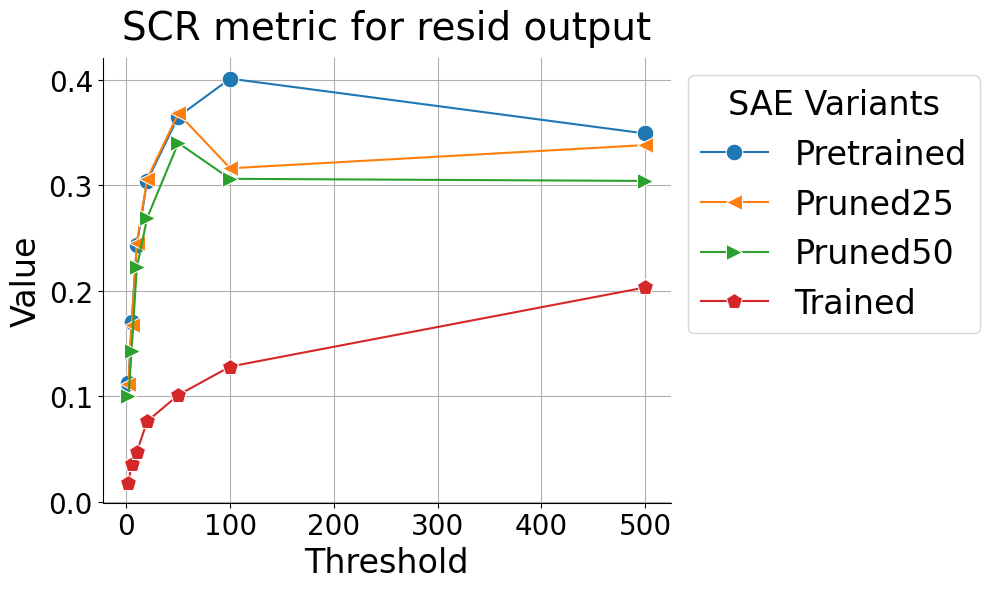

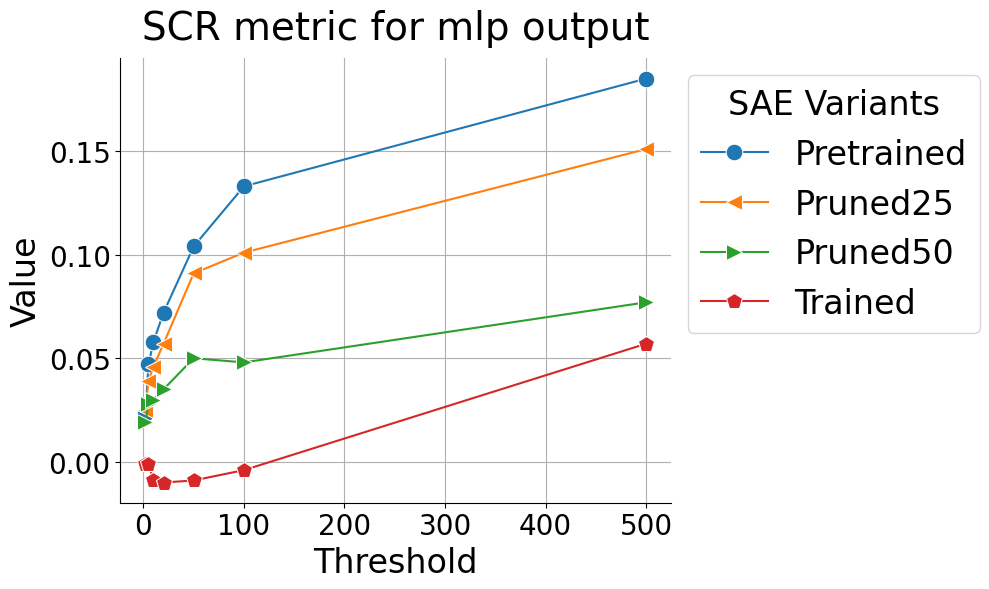

In [36]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

outputs = ['resid', 'mlp']
for out in outputs:
    df = pd.read_csv(f'/local/scratch/suchit/COLM/result_files/{out}/scr.csv')
    
    # Filter rows that contain 'scr_metric_threshold'
    scr_metric_df = df[df["metric"].str.contains("scr_metric_threshold")].copy()

    # Extract threshold from metric column
    scr_metric_df["threshold"] = scr_metric_df["metric"].str.extract(r"threshold_(\d+)").astype(int)

    # Sort by threshold for proper plotting
    scr_metric_df = scr_metric_df.sort_values(by="threshold")

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.lineplot(x="threshold", y="pretrained", data=scr_metric_df, marker='o', markersize=12, label='Pretrained')
    sns.lineplot(x="threshold", y="pruned25", data=scr_metric_df, marker='<', markersize=12, label='Pruned25')
    sns.lineplot(x="threshold", y="pruned50", data=scr_metric_df, marker='>', markersize=12, label='Pruned50')
    sns.lineplot(x="threshold", y="trained", data=scr_metric_df, marker='p', markersize=12, label='Trained')

    plt.title(f'SCR metric for {out} output', fontsize=28, pad=14)
    plt.xlabel('Threshold', fontsize=24)
    plt.tick_params(axis='x', labelsize=20) 
    plt.tick_params(axis='y', labelsize=20) 
    plt.grid(True)
    plt.ylabel('Value', fontsize=24)
    plt.legend(title='SAE Variants', fontsize=24, title_fontsize=24, loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
    plt.tight_layout()
    sns.despine()
    # Save the plot (before plt.show)
    plt.tight_layout()
    plt.savefig(f'scr_{out}.png', dpi=300)   # High-res PNG
    plt.savefig(f'scr_{out}.pdf', transparent=True)
    plt.show()  


                                    metric  pruned50  pretrained  pruned25  \
0             tpp_threshold_2_total_metric     0.007       0.008     0.008   
1       tpp_threshold_2_intended_diff_only     0.010       0.011     0.011   
2     tpp_threshold_2_unintended_diff_only     0.003       0.003     0.002   
3             tpp_threshold_5_total_metric     0.012       0.015     0.014   
4       tpp_threshold_5_intended_diff_only     0.014       0.018     0.016   
5     tpp_threshold_5_unintended_diff_only     0.003       0.003     0.003   
6            tpp_threshold_10_total_metric     0.018       0.022     0.021   
7      tpp_threshold_10_intended_diff_only     0.022       0.026     0.025   
8    tpp_threshold_10_unintended_diff_only     0.004       0.004     0.004   
9            tpp_threshold_20_total_metric     0.041       0.046     0.047   
10     tpp_threshold_20_intended_diff_only     0.047       0.053     0.054   
11   tpp_threshold_20_unintended_diff_only     0.007       0.007

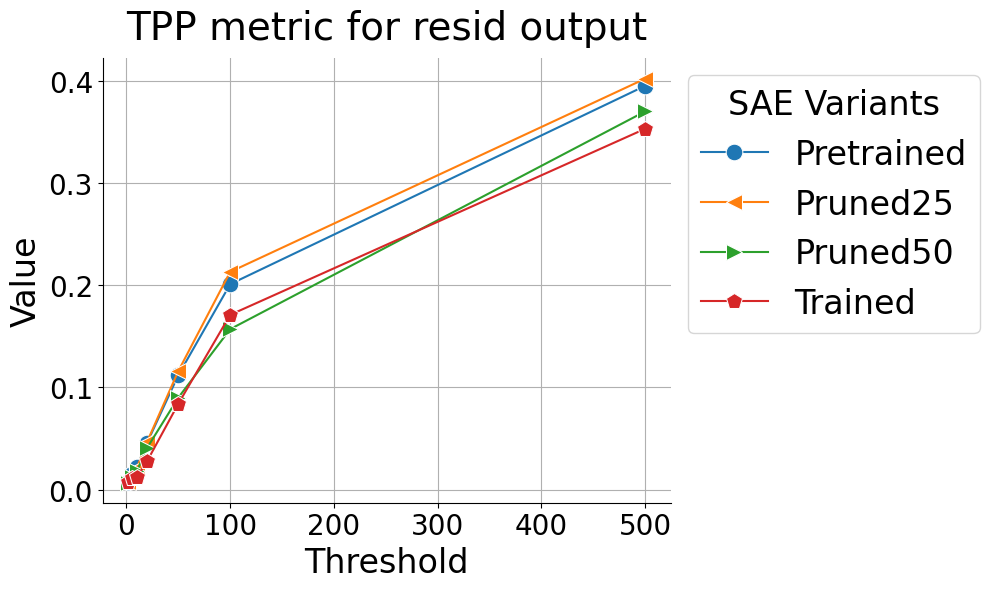

                                    metric  pruned50  trained  pretrained  \
0             tpp_threshold_2_total_metric     0.004    0.003       0.004   
1       tpp_threshold_2_intended_diff_only     0.005    0.004       0.006   
2     tpp_threshold_2_unintended_diff_only     0.001    0.001       0.002   
3             tpp_threshold_5_total_metric     0.010    0.004       0.012   
4       tpp_threshold_5_intended_diff_only     0.012    0.005       0.013   
5     tpp_threshold_5_unintended_diff_only     0.002    0.001       0.002   
6            tpp_threshold_10_total_metric     0.014    0.004       0.015   
7      tpp_threshold_10_intended_diff_only     0.016    0.005       0.018   
8    tpp_threshold_10_unintended_diff_only     0.002    0.001       0.003   
9            tpp_threshold_20_total_metric     0.026    0.007       0.029   
10     tpp_threshold_20_intended_diff_only     0.031    0.009       0.034   
11   tpp_threshold_20_unintended_diff_only     0.004    0.002       0.005   

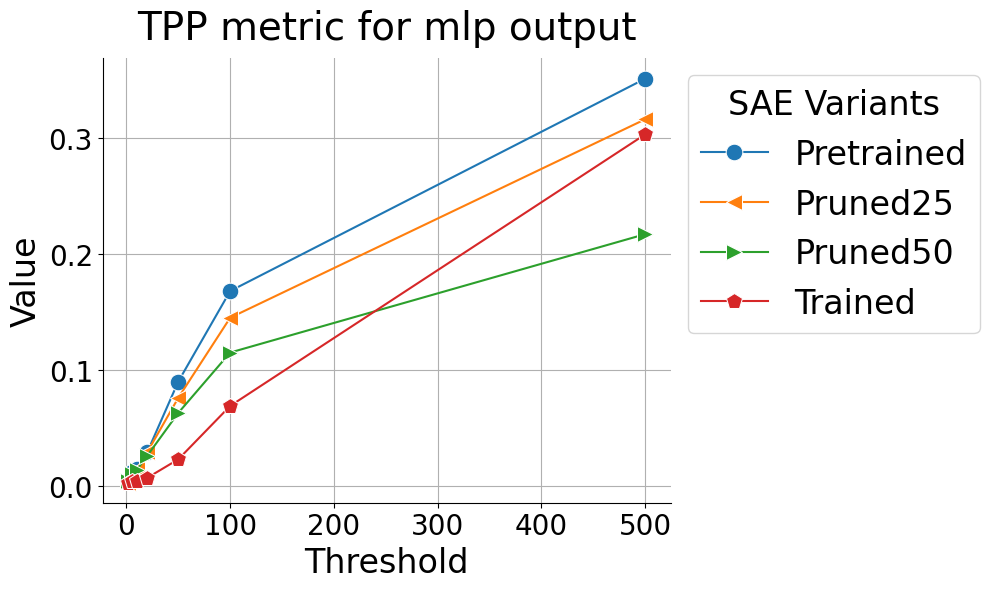

In [40]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

outputs = ['resid', 'mlp']
for out in outputs:
    tpp_df = pd.read_csv(f'/local/scratch/suchit/COLM/result_files/{out}/tpp.csv')
    print(tpp_df)
    # Filter rows that contain 'total_metric'
    tpp_total_df = tpp_df[tpp_df["metric"].str.contains("total_metric")].copy()

    # Extract threshold from metric column
    tpp_total_df["threshold"] = tpp_total_df["metric"].str.extract(r"threshold_(\d+)_").astype(int)

    # Sort by threshold for proper plotting
    tpp_total_df = tpp_total_df.sort_values(by="threshold")

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.lineplot(x="threshold", y="pretrained", data=tpp_total_df, marker='o', markersize=12, label='Pretrained')
    sns.lineplot(x="threshold", y="pruned25", data=tpp_total_df, marker='<', markersize=12, label='Pruned25')
    sns.lineplot(x="threshold", y="pruned50", data=tpp_total_df, marker='>', markersize=12, label='Pruned50')
    sns.lineplot(x="threshold", y="trained", data=tpp_total_df, marker='p', markersize=12, label='Trained')

    plt.title(f'TPP metric for {out} output', fontsize=28, pad=14)
    plt.xlabel('Threshold', fontsize=24)
    plt.tick_params(axis='x', labelsize=20) 
    plt.tick_params(axis='y', labelsize=20) 
    plt.grid(True)
    plt.ylabel('Value', fontsize=24)
    plt.legend(title='SAE Variants', fontsize=24, title_fontsize=24, loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
    plt.tight_layout()
    sns.despine()
    # Save the plot (before plt.show)
    plt.tight_layout()
    plt.savefig(f'tpp_{out}.png', dpi=300)   # High-res PNG
    plt.savefig(f'tpp_{out}.pdf', transparent=True)
    plt.show()  
